In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Algerian_Cleaned.csv')

In [29]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [31]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [33]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [34]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [35]:
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [36]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [37]:
X.sample(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
39,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0,0
67,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,1,0
187,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0,1
89,35,48,18,0.0,90.1,54.2,220.4,12.5,67.4,1,0
103,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0,0
100,30,77,15,1.0,56.1,2.1,8.4,0.7,2.6,0,0
108,31,52,14,0.0,87.7,6.4,24.3,6.2,7.7,1,0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0,1
142,32,55,14,0.0,86.2,8.3,18.4,5.0,8.2,1,1
205,35,38,15,0.0,92.1,51.3,147.7,12.2,54.9,1,1


In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [39]:
X_train.shape, y_train.shape

((182, 11), (182,))

In [40]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

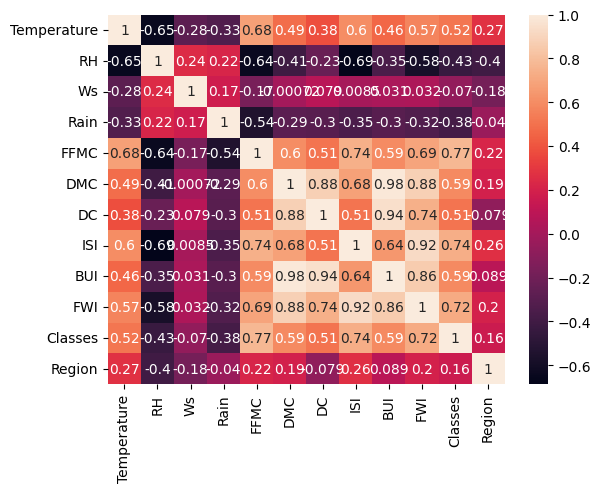

In [41]:
sns.heatmap(df.corr(), annot = True)

In [42]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()  # Calculate the correlation matrix
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


In [43]:
corr_features = correlation(X_train, 0.85)

In [44]:
corr_features

{'BUI', 'DC'}

In [45]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

# Feature Scaling and Standardization 

In [46]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Box plot to understand the effect of Scaling

Text(0.5, 1.0, 'X_train after Scaling')

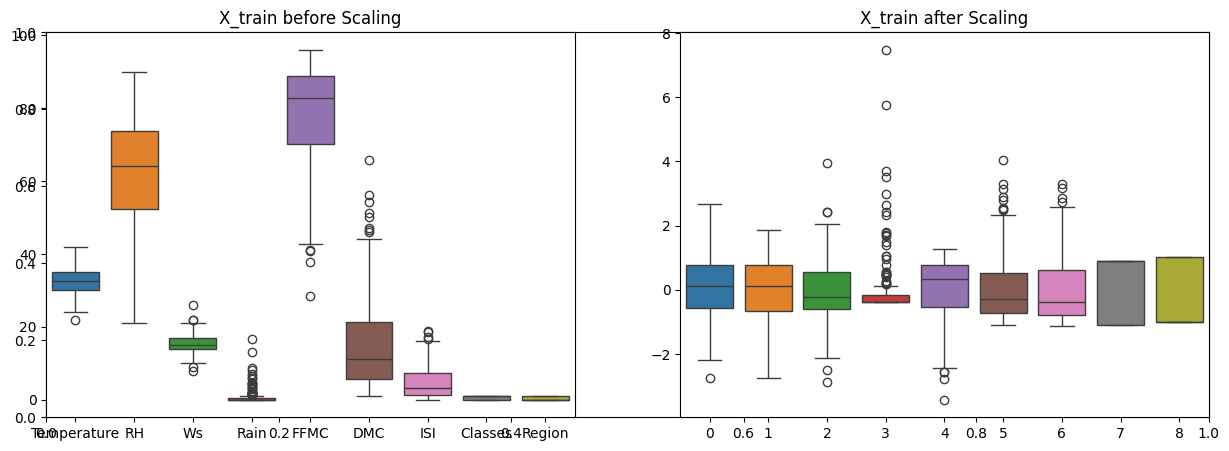

In [49]:
plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title("X_train before Scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after Scaling")

In [51]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


The Mean Absolute Error is: 0.546823646524997
The R2 Score is: 0.9847657384266951


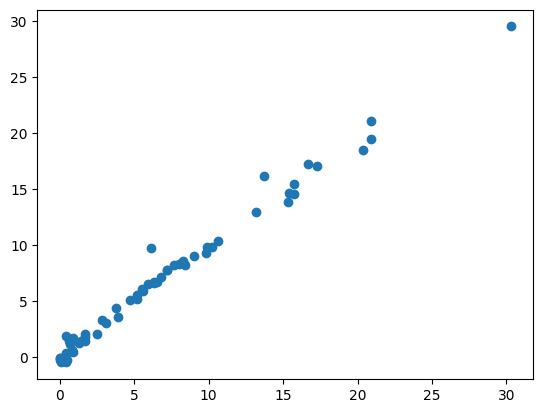

In [52]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score 
print("The Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("The R2 Score is:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

The Mean Absolute Error is: 1.133175994914409
The R2 Score is: 0.9492020263112388


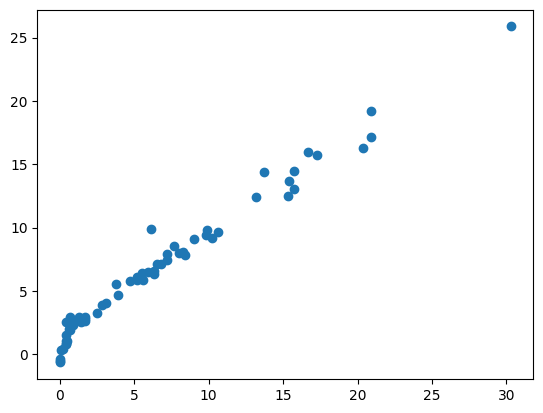

In [53]:
from sklearn.linear_model import Lasso  
regression = Lasso() 
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score 
print("The Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("The R2 Score is:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

The Mean Absolute Error is: 0.5642305340105691
The R2 Score is: 0.9842993364555513


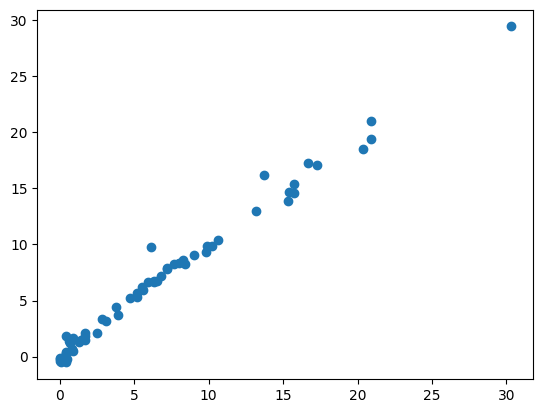

In [69]:
from sklearn.linear_model import Ridge 
regression = Ridge() 
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score 
print("The Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("The R2 Score is:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

The Mean Absolute Error is: 0.5895957224882225
The R2 Score is: 0.9832350686446291


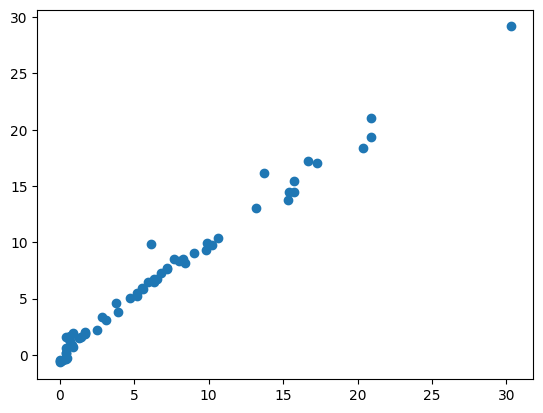

In [59]:
from sklearn.linear_model import LassoCV 
regression = LassoCV(cv = 100)
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score 
print("The Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("The R2 Score is:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

In [60]:
regression.alpha_

np.float64(0.040391503901648536)

In [63]:
regression.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

The Mean Absolute Error is: 0.5642305340105691
The R2 Score is: 0.9842993364555513


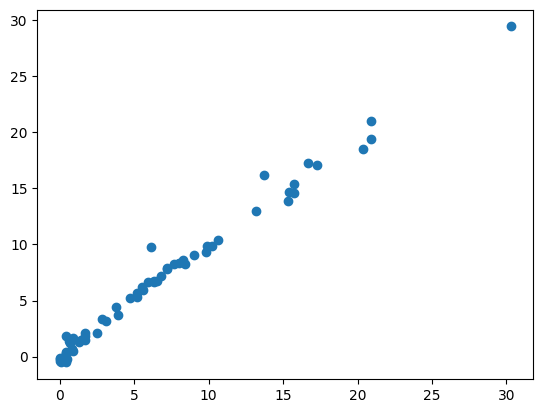

In [65]:
from sklearn.linear_model import RidgeCV 
regression = RidgeCV(cv = 90)
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score 
print("The Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("The R2 Score is:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

The Mean Absolute Error is: 0.6161573305994085
The R2 Score is: 0.9828116462390981


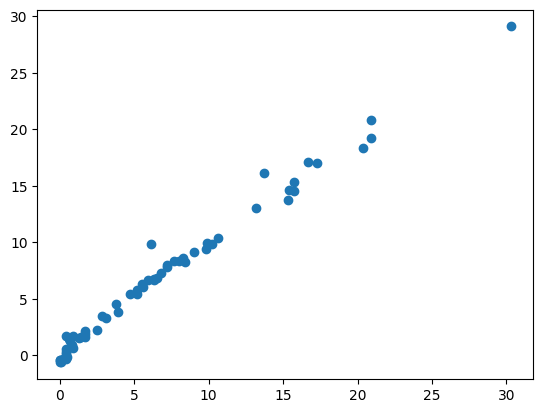

In [66]:
from sklearn.linear_model import ElasticNetCV 
regression = ElasticNetCV(cv = 90)
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score 
print("The Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("The R2 Score is:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

# Pickle the machine learning model, preprocessing and SctandardScaler 

In [70]:
import pickle 
pickle.dump(regression, open('ridge.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))